In [1]:
import pandas as pd
import numpy as np

In [3]:
# Timestamp
pd.Timestamp('6th jan 2023 8:10')

Timestamp('2023-01-06 08:10:00')

In [4]:
# DatetimeIndex -> df and series index
pd.DatetimeIndex([pd.Timestamp('6th jan 2023 8:10'),pd.Timestamp('7th jan 2023 8:10'),pd.Timestamp('8th jan 2023 8:10')])[0]

Timestamp('2023-01-06 08:10:00')

In [5]:
# date_range()
pd.date_range(start='2023-1-6',end='2023-1-31',freq='D')

DatetimeIndex(['2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09',
               '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
               '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-21',
               '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25',
               '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29',
               '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', freq='D')

In [6]:
# to_datetime()
s = pd.Series(['2023/1/6','2023/1/7','2023/1/7'])
pd.to_datetime(s).dt.day_name()

0      Friday
1    Saturday
2    Saturday
dtype: object

## Timedelta Object

Represents a duration, the difference between two dates or times.

In [8]:
t1 = pd.Timestamp('5th jan 2024 8:20:25')
t2 = pd.Timestamp('20th june 2024 8:20:25')
t2 - t1

Timedelta('167 days 00:00:00')

### Creating a timedelta object

In [9]:
pd.Timedelta(days=2,hours=10,minutes=15)

Timedelta('2 days 10:15:00')

### Arithmetic operation on timedelta objects

In [10]:
pd.Timestamp('6th jan 2023') + pd.Timedelta(days=2,hours=10,minutes=35)

Timestamp('2023-01-08 10:35:00')

In [11]:
pd.date_range(start='2023-1-6',end='2023-1-31',freq='D')

DatetimeIndex(['2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09',
               '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
               '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-21',
               '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25',
               '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29',
               '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', freq='D')

### We can add/remove a timedelta object to all the date range

In [12]:
pd.date_range(start='2023-1-6',end='2023-1-31',freq='D') + pd.Timedelta(days=2,hours=10,minutes=35)

DatetimeIndex(['2023-01-08 10:35:00', '2023-01-09 10:35:00',
               '2023-01-10 10:35:00', '2023-01-11 10:35:00',
               '2023-01-12 10:35:00', '2023-01-13 10:35:00',
               '2023-01-14 10:35:00', '2023-01-15 10:35:00',
               '2023-01-16 10:35:00', '2023-01-17 10:35:00',
               '2023-01-18 10:35:00', '2023-01-19 10:35:00',
               '2023-01-20 10:35:00', '2023-01-21 10:35:00',
               '2023-01-22 10:35:00', '2023-01-23 10:35:00',
               '2023-01-24 10:35:00', '2023-01-25 10:35:00',
               '2023-01-26 10:35:00', '2023-01-27 10:35:00',
               '2023-01-28 10:35:00', '2023-01-29 10:35:00',
               '2023-01-30 10:35:00', '2023-01-31 10:35:00',
               '2023-02-01 10:35:00', '2023-02-02 10:35:00'],
              dtype='datetime64[ns]', freq='D')

### Let's see with a practical example

In [13]:
df = pd.read_csv('deliveries_product.csv')

In [14]:
df

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98
...,...,...
496,6/24/91,2/2/96
497,9/9/91,3/30/98
498,11/16/90,4/27/98
499,6/3/93,6/13/93


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_date     501 non-null    object
 1   delivery_date  501 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


### Let's convert these columns to date-time object

In [19]:
pd.to_datetime(df['order_date'])

/var/folders/h1/njy9595n2lj4xjmnz1st5v4h0000gn/T/ipykernel_1354/1465191423.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['order_date'])


0     1998-05-24
1     1992-04-22
2     1991-02-10
3     1992-07-21
4     1993-09-02
         ...    
496   1991-06-24
497   1991-09-09
498   1990-11-16
499   1993-06-03
500   1990-01-04
Name: order_date, Length: 501, dtype: datetime64[ns]

In [20]:
df['order_date'] = pd.to_datetime(df['order_date'])

/var/folders/h1/njy9595n2lj4xjmnz1st5v4h0000gn/T/ipykernel_1354/2765250300.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'])


In [21]:
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

/var/folders/h1/njy9595n2lj4xjmnz1st5v4h0000gn/T/ipykernel_1354/800468559.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['delivery_date'] = pd.to_datetime(df['delivery_date'])


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_date     501 non-null    datetime64[ns]
 1   delivery_date  501 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 8.0 KB


### let's find out time taken to deliver a prodect

In [24]:
df['delivery_date'] - df['order_date']

0      257 days
1     2144 days
2      563 days
3     1948 days
4     1742 days
         ...   
496   1684 days
497   2394 days
498   2719 days
499     10 days
500    637 days
Length: 501, dtype: timedelta64[ns]

### Add this to the dataframe

In [25]:
df['time to deliver'] = df['delivery_date'] - df['order_date']

In [26]:
df

,order_date,delivery_date,time to deliver
0,1998-05-24,1999-02-05,257 days
1,1992-04-22,1998-03-06,2144 days
2,1991-02-10,1992-08-26,563 days
3,1992-07-21,1997-11-20,1948 days
4,1993-09-02,1998-06-10,1742 days
...,...,...,...
496,1991-06-24,1996-02-02,1684 days
497,1991-09-09,1998-03-30,2394 days
498,1990-11-16,1998-04-27,2719 days
499,1993-06-03,1993-06-13,10 days


### average time taken for one delivery

In [27]:
df['time to deliver'].mean()

Timedelta('1217 days 22:53:53.532934128')

In [28]:
google = pd.read_csv('GOOGL.csv')

In [29]:
google

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [30]:
login = pd.read_csv('login.csv')

In [31]:
login

,1,466,2017-01-07 18:24:07,Unnamed: 3
0,2,466,2017-01-07 18:24:55,NaN
1,3,458,2017-01-07 18:25:18,NaN
2,4,458,2017-01-07 18:26:21,NaN
3,5,592,2017-01-07 19:09:59,NaN
4,6,393,2017-01-08 00:41:19,NaN
...,...,...,...,...
2997,2999,1307,2018-01-04 10:48:28,183.82.121.201
2998,3000,1230,2018-01-04 11:22:00,47.247.147.114
2999,3001,1307,2018-01-04 13:13:44,183.82.121.201
3000,3002,1307,2018-01-04 13:13:45,183.82.121.201


In [32]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [34]:
google['Date'] = pd.to_datetime(google['Date'])

In [35]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4431 non-null   datetime64[ns]
 1   Open       4431 non-null   float64       
 2   High       4431 non-null   float64       
 3   Low        4431 non-null   float64       
 4   Close      4431 non-null   float64       
 5   Adj Close  4431 non-null   float64       
 6   Volume     4431 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 242.4 KB


### It is suggested that make your date column as index

In [36]:
google.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800


In [37]:
google.set_index('Date',inplace=True)

In [38]:
google

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800


### to see a perticulare date the values

In [40]:
google.loc['2008-11-10']

Open         1.641642e+02
High         1.648849e+02
Low          1.548899e+02
Close        1.595495e+02
Adj Close    1.595495e+02
Volume       1.614404e+07
Name: 2008-11-10 00:00:00, dtype: float64

### to see the google performance for perticuler month

In [41]:
google.loc['2012-08']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-08-01,318.968964,320.075073,316.006012,316.656647,316.656647,3685511
2012-08-02,313.068054,319.334320,312.017029,314.689697,314.689697,3951445
2012-08-03,320.320313,322.182190,318.388397,320.985992,320.985992,3790406
2012-08-06,320.125122,325.015015,319.929932,321.731720,321.731720,3561235
2012-08-07,321.216217,322.452454,318.553558,320.590576,320.590576,3959636
2012-08-08,319.844849,323.258270,319.569580,321.436432,321.436432,2641756
2012-08-09,322.577576,323.508514,321.081085,321.496490,321.496490,2138459
2012-08-10,319.614624,321.441437,318.383392,321.321320,321.321320,2866331
2012-08-13,324.034027,330.405396,323.663666,330.335327,330.335327,6529264


### to see the google performance for perticuler year

In [42]:
google.loc['2019']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,1027.199951,1060.790039,1025.280029,1054.680054,1054.680054,1593400
2019-01-03,1050.670044,1066.260010,1022.369995,1025.469971,1025.469971,2098000
2019-01-04,1042.560059,1080.000000,1036.859985,1078.069946,1078.069946,2301100
2019-01-07,1080.969971,1082.699951,1062.640015,1075.920044,1075.920044,2372300
2019-01-08,1086.000000,1093.349976,1068.349976,1085.369995,1085.369995,1770700
...,...,...,...,...,...,...
2019-12-24,1350.209961,1352.010010,1344.170044,1344.430054,1344.430054,673400
2019-12-26,1346.550049,1363.199951,1345.510010,1362.469971,1362.469971,1183100
2019-12-27,1364.000000,1367.050049,1353.000000,1354.640015,1354.640015,1160600


### Let's extract the month name from the index(date column)

In [44]:
google.index.month_name()

Index(['August', 'August', 'August', 'August', 'August', 'August', 'August',
       'August', 'August', 'September',
       ...
       'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March',
       'March', 'March'],
      dtype='object', name='Date', length=4431)

### add it to the main dataframe

In [45]:
google['Month_name'] = google.index.month_name()

### Do the same thing for the days as well

In [46]:
google['Day_name'] = google.index.day_name()

In [49]:
google['Quater'] = google.index.quarter

In [50]:
google

,Open,High,Low,Close,Adj Close,Volume,Month_name,Day_name,Quater
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,August,Monday,3
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,August,Tuesday,3
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,August,Wednesday,3
...,...,...,...,...,...,...,...,...,...
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100,March,Friday,1
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600,March,Monday,1
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800,March,Tuesday,1


## Slicing: if we wanna see google's performance in a range of dates

In [51]:
google.loc['2011-12-15':'2011-12-31']

,Open,High,Low,Close,Adj Close,Volume,Month_name,Day_name,Quater
Date,,,,,,,,,
2011-12-15,311.571564,312.312317,309.654663,310.080078,310.080078,4812383,December,Thursday,4
2011-12-16,312.472473,314.974976,311.046051,313.293304,313.293304,8909681,December,Friday,4
2011-12-19,314.319305,314.564575,310.310303,311.226227,311.226227,4282713,December,Monday,4
2011-12-20,314.314301,316.236237,314.309296,315.500488,315.500488,4771624,December,Tuesday,4
2011-12-21,315.320313,316.226227,309.789795,313.223236,313.223236,4990804,December,Wednesday,4
2011-12-22,314.289276,316.181183,313.818817,315.165161,315.165161,3640955,December,Thursday,4
2011-12-23,316.316315,317.657654,315.595581,316.886902,316.886902,2904493,December,Friday,4
2011-12-27,316.341339,322.567566,316.316315,320.445435,320.445435,3209587,December,Tuesday,4
2011-12-28,321.696686,322.822815,319.369354,320.170166,320.170166,4250146,December,Wednesday,4


### Case1: let's find out google's performance on a perticular date in each year

Let's first generates the dates

One was to solve this use date_range function and pass a timedelta object for frequency for 365 days but problem with this approach is because of leap year it changes the expected date by skipping the leap year while adding 365

In [52]:
pd.date_range(start='2005-01-05',end='2022-01-05',freq=pd.Timedelta(days=365))

DatetimeIndex(['2005-01-05', '2006-01-05', '2007-01-05', '2008-01-05',
               '2009-01-04', '2010-01-04', '2011-01-04', '2012-01-04',
               '2013-01-03', '2014-01-03', '2015-01-03', '2016-01-03',
               '2017-01-02', '2018-01-02', '2019-01-02', '2020-01-02',
               '2021-01-01', '2022-01-01'],
              dtype='datetime64[ns]', freq='365D')

### To solve the problem we can use dateoffset

In [54]:
pd.date_range(start='2005-01-05',end='2022-01-05',freq=pd.DateOffset(years=1))

DatetimeIndex(['2005-01-05', '2006-01-05', '2007-01-05', '2008-01-05',
               '2009-01-05', '2010-01-05', '2011-01-05', '2012-01-05',
               '2013-01-05', '2014-01-05', '2015-01-05', '2016-01-05',
               '2017-01-05', '2018-01-05', '2019-01-05', '2020-01-05',
               '2021-01-05', '2022-01-05'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

### Now pass this datetime object into google index by using the syntax below to get a boolean series

In [55]:
google.index.isin(pd.date_range(start='2005-01-05',end='2022-01-05',freq=pd.DateOffset(years=1)))

array([False, False, False, ..., False, False, False])

### finally to get the values on those perticular dates; if any dates are missing that's because of any such dates were saturdays or sundays

In [56]:
google[google.index.isin(pd.date_range(start='2005-01-05',end='2022-01-05',freq=pd.DateOffset(years=1)))]

,Open,High,Low,Close,Adj Close,Volume,Month_name,Day_name,Quater
Date,,,,,,,,,
2005-01-05,96.821823,98.548546,96.211212,96.851852,96.851852,16456727,January,Wednesday,1
2006-01-05,223.223221,226.001007,220.970978,225.845840,225.845840,21594983,January,Thursday,1
2007-01-05,241.491486,243.993988,239.294296,243.838837,243.838837,13730456,January,Friday,1
2009-01-05,160.660660,165.785782,157.657654,164.189194,164.189194,9768222,January,Monday,1
2010-01-05,313.903900,314.234222,311.081085,312.307312,312.307312,6003391,January,Tuesday,1
2011-01-05,300.335327,305.470459,300.325317,304.839844,304.839844,5059535,January,Wednesday,1
2012-01-05,331.396393,332.317322,328.443451,329.834839,329.834839,6559234,January,Thursday,1
2015-01-05,527.150024,527.989990,517.750000,519.460022,519.460022,2059100,January,Monday,1
2016-01-05,764.099976,769.200012,755.650024,761.530029,761.530029,2260800,January,Tuesday,1


## Plotting: let's plot google's closing performance over the years

<Axes: xlabel='Date'>

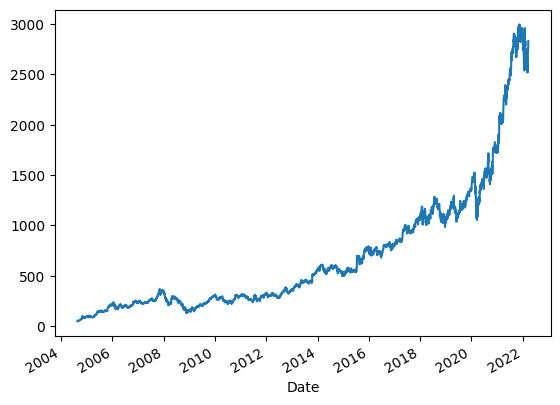

In [57]:
google['Close'].plot()

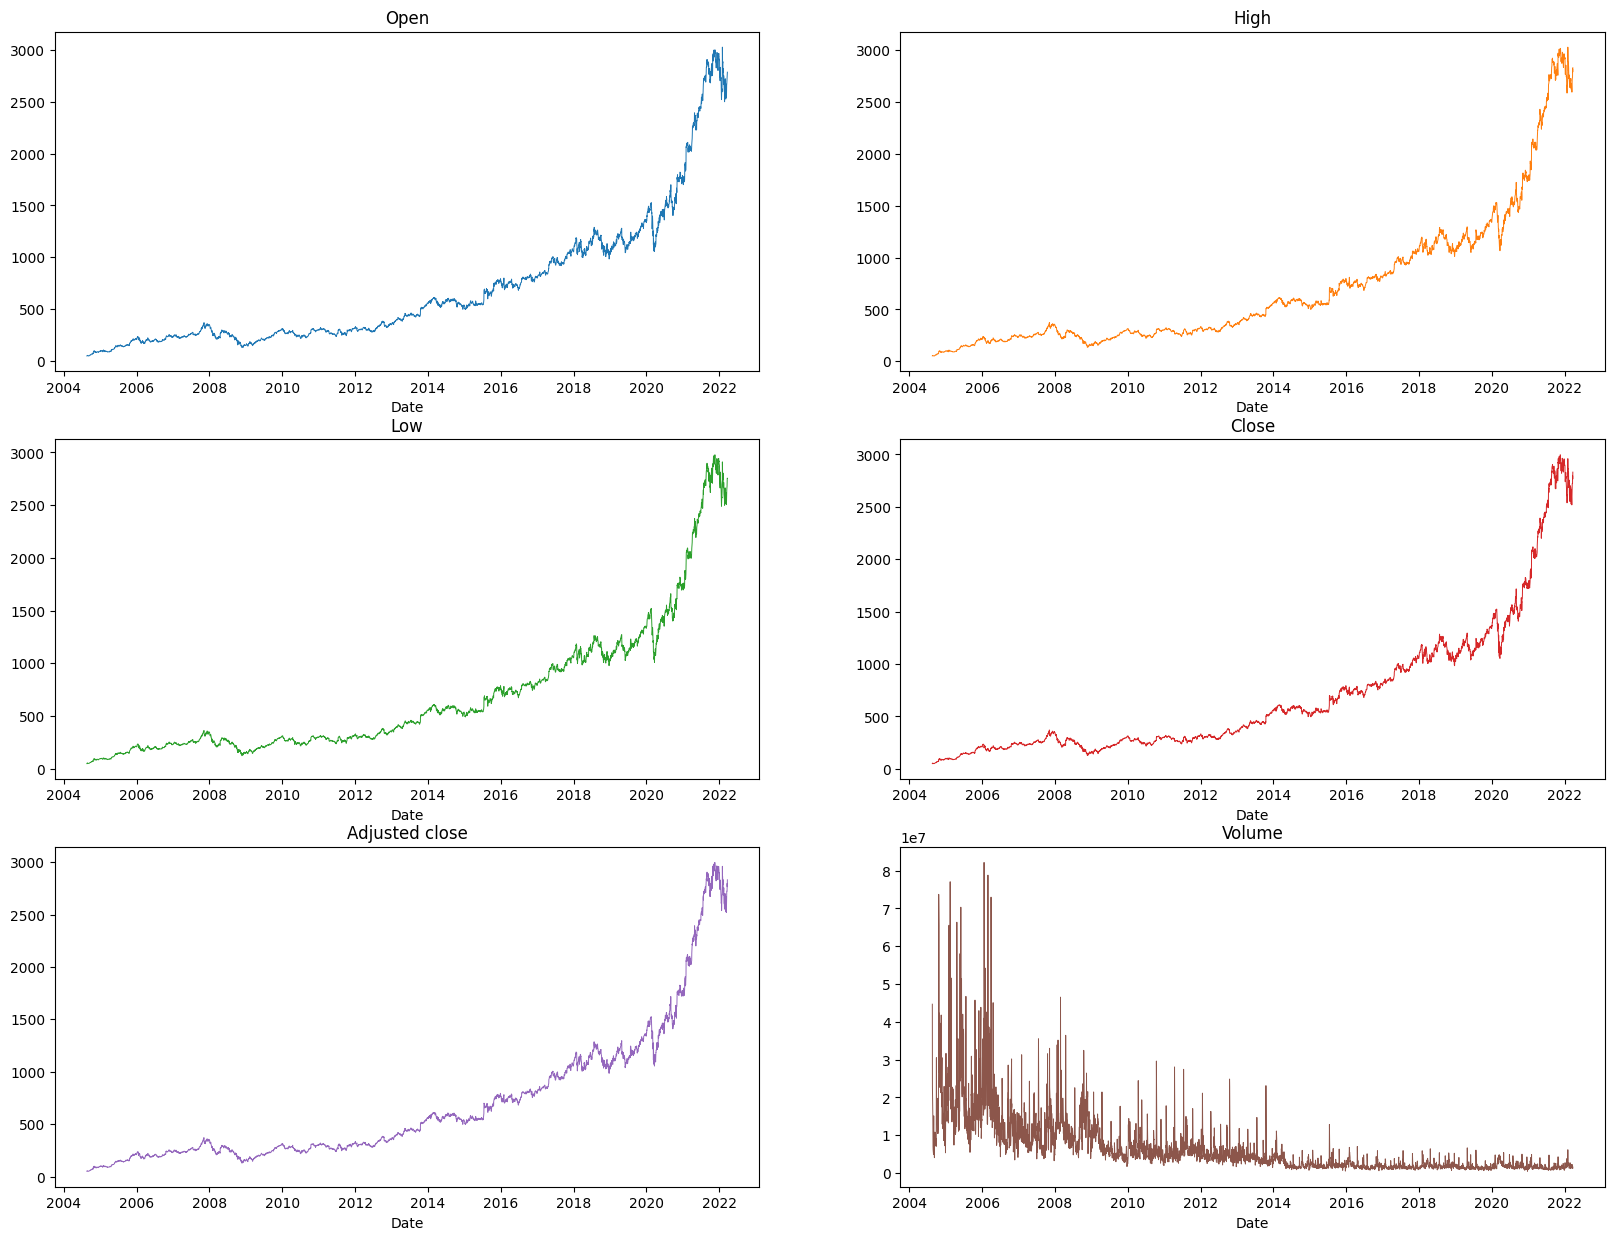

In [60]:
# viz all cols together
subset_google = google[['Open', 'High', 'Low', 'Close','Adj Close','Volume']]
ax = subset_google.plot(subplots=True,
                    layout=(3, 2),
                     sharex=False,
                     sharey=False,
                     linewidth=0.7,
                     fontsize=10,
                     legend=False,
                      figsize=(20,15),
                      title=['Open', 'High', 'Low', 'Close','Adjusted close','Volume'])

## Plot it for a perticular month or year

<Axes: xlabel='Date'>

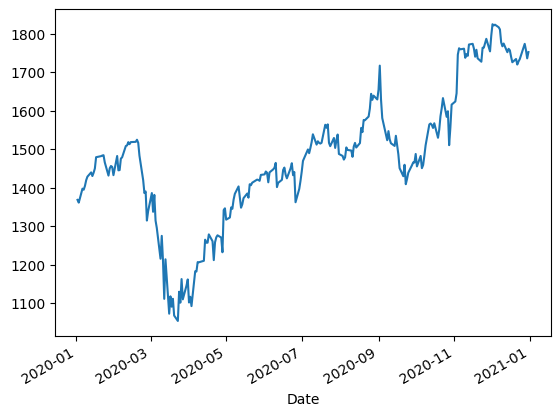

In [63]:
google.loc['2020']['Close'].plot()

<Axes: xlabel='Date'>

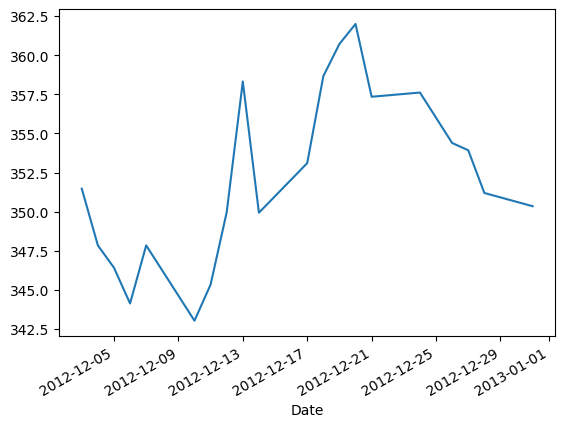

In [65]:
google.loc['2012-12']['Open'].plot()

## asfreq() to add a frquency

In [67]:
google.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-03-11', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24'],
              dtype='datetime64[ns]', name='Date', length=4431, freq=None)

In [70]:
google.asfreq('D') # for daily basis nan values represent no values as those are weenends

,Open,High,Low,Close,Adj Close,Volume,Month_name,Day_name,Quater
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0,August,Thursday,3.0
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343.0,August,Friday,3.0
2004-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126.0,August,Monday,3.0
...,...,...,...,...,...,...,...,...,...
2022-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600.0,March,Monday,1.0
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800.0,March,Tuesday,1.0


In [71]:
google.asfreq('B') # only business days

,Open,High,Low,Close,Adj Close,Volume,Month_name,Day_name,Quater
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0,August,Thursday,3.0
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343.0,August,Friday,3.0
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126.0,August,Monday,3.0
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337.0,August,Tuesday,3.0
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602.0,August,Wednesday,3.0
...,...,...,...,...,...,...,...,...,...
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100.0,March,Friday,1.0
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600.0,March,Monday,1.0
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800.0,March,Tuesday,1.0


In [72]:
google.asfreq('Y')

,Open,High,Low,Close,Adj Close,Volume,Month_name,Day_name,Quater
Date,,,,,,,,,
2004-12-31,99.714714,100.040039,96.376373,96.491493,96.491493,15321663.0,December,Friday,4.0
2005-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-31,349.634644,351.596588,345.635651,346.086090,346.086090,4747648.0,December,Monday,4.0
2008-12-31,152.252258,155.655655,151.456451,153.978973,153.978973,5767826.0,December,Wednesday,4.0
2009-12-31,312.687683,313.013000,310.300293,310.300293,310.300293,2437160.0,December,Thursday,4.0
2010-12-31,298.668671,299.509521,296.311310,297.282288,297.282288,3075521.0,December,Friday,4.0
2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-31,350.350342,355.640656,348.348358,354.044037,354.044037,3990805.0,December,Monday,4.0


In [73]:
google.asfreq('H')

,Open,High,Low,Close,Adj Close,Volume,Month_name,Day_name,Quater
Date,,,,,,,,,
2004-08-19 00:00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0,August,Thursday,3.0
2004-08-19 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-19 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-19 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-19 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-03-23 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-23 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-23 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
google.asfreq('6H')

,Open,High,Low,Close,Adj Close,Volume,Month_name,Day_name,Quater
Date,,,,,,,,,
2004-08-19 00:00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0,August,Thursday,3.0
2004-08-19 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-19 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-19 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20 00:00:00,50.555557,54.594597,50.300301,54.209209,54.209209,22834343.0,August,Friday,3.0
...,...,...,...,...,...,...,...,...,...
2022-03-23 00:00:00,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700.0,March,Wednesday,1.0
2022-03-23 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-23 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## parameter 'method=' values 'ffill' and 'bfill'. we can use this parameter to fill the nan values with back fill and forward fill

In [77]:
google.asfreq('6H',method='bfill')

,Open,High,Low,Close,Adj Close,Volume,Month_name,Day_name,Quater
Date,,,,,,,,,
2004-08-19 00:00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-19 06:00:00,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
2004-08-19 12:00:00,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
2004-08-19 18:00:00,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
2004-08-20 00:00:00,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
...,...,...,...,...,...,...,...,...,...
2022-03-23 00:00:00,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700,March,Wednesday,1
2022-03-23 06:00:00,2784.000000,2832.379883,2755.010010,2831.439941,2831.439941,1317900,March,Thursday,1
2022-03-23 12:00:00,2784.000000,2832.379883,2755.010010,2831.439941,2831.439941,1317900,March,Thursday,1


In [79]:
google.asfreq('6H',method='ffill')

,Open,High,Low,Close,Adj Close,Volume,Month_name,Day_name,Quater
Date,,,,,,,,,
2004-08-19 00:00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-19 06:00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-19 12:00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-19 18:00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-20 00:00:00,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
...,...,...,...,...,...,...,...,...,...
2022-03-23 00:00:00,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700,March,Wednesday,1
2022-03-23 06:00:00,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700,March,Wednesday,1
2022-03-23 12:00:00,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700,March,Wednesday,1


### quaterly data

In [83]:
google.asfreq('Q')

,Open,High,Low,Close,Adj Close,Volume,Month_name,Day_name,Quater
Date,,,,,,,,,
2004-09-30,65.015015,66.216217,64.564568,64.864868,64.864868,13758028.0,September,Thursday,3.0
2004-12-31,99.714714,100.040039,96.376373,96.491493,96.491493,15321663.0,December,Friday,4.0
2005-03-31,89.064064,90.785789,88.908913,90.345345,90.345345,13523663.0,March,Thursday,1.0
2005-06-30,147.317322,149.614609,145.665665,147.222229,147.222229,30158611.0,June,Thursday,2.0
2005-09-30,157.267273,158.908905,156.301300,158.388382,158.388382,18284297.0,September,Friday,3.0
...,...,...,...,...,...,...,...,...,...
2020-12-31,1737.270020,1757.500000,1736.089966,1752.640015,1752.640015,1053500.0,December,Thursday,4.0
2021-03-31,2054.399902,2086.260010,2047.000000,2062.520020,2062.520020,2128500.0,March,Wednesday,1.0
2021-06-30,2439.889893,2445.139893,2427.090088,2441.790039,2441.790039,1223700.0,June,Wednesday,2.0


### plot quaterly data blank represent no data available

<Axes: xlabel='Date'>

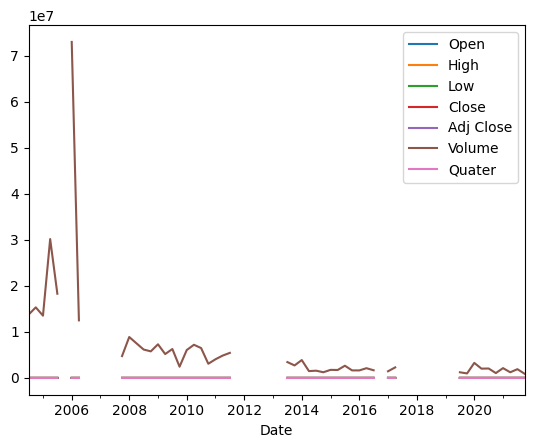

In [85]:
# google.asfreq('Q').isna().sum()
google.asfreq('Q').plot()

<Axes: xlabel='Quater'>

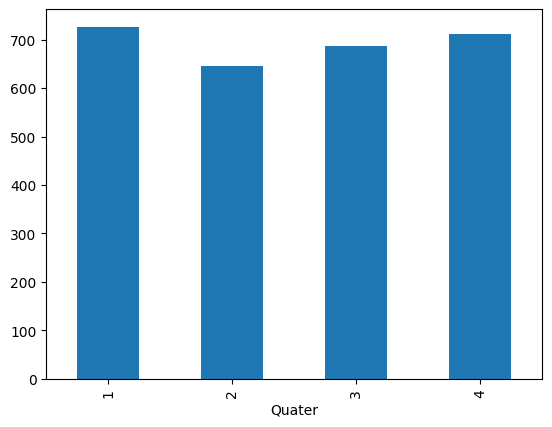

In [87]:
google.groupby('Quater')['Close'].mean().plot(kind='bar')

## Resampling

Resampling involves changing the frequency of your time series observations.

Two types of resampling are:

**Upsampling**: Where you increase the frequency of the samples, such as from minutes to seconds.<br>
**Downsampling**: Where you decrease the frequency of the samples, such as from days to months.

In [96]:
google.shape

(4431, 9)

In [98]:
google['Close'].resample('W')

## downsampling:  from higher number of rows to lower number of rows

In [97]:
google['Close'].resample('W').mean()

Date
2004-08-22      52.214714
2004-08-29      53.486487
2004-09-05      50.665666
2004-09-12      51.491491
2004-09-19      56.301301
                 ...     
2022-02-27    2622.760010
2022-03-06    2677.983936
2022-03-13    2596.812012
2022-03-20    2633.576025
2022-03-27    2779.085022
Freq: W-SUN, Name: Close, Length: 919, dtype: float64

In [101]:
google['Close'].resample('W').mean().shape

(919,)

<Axes: xlabel='Date'>

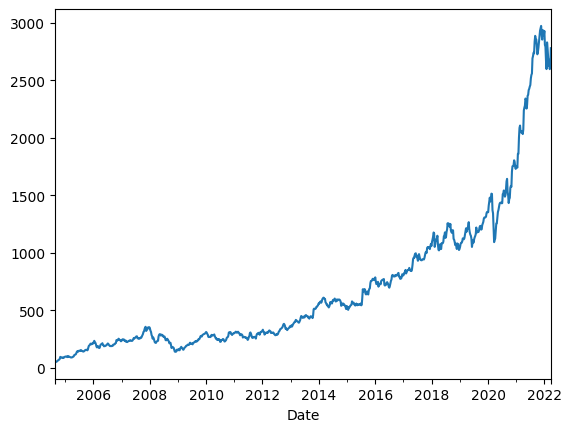

In [92]:
google['Close'].resample('W').mean().plot() # downsampling

In [103]:
google['Close'].resample('M').mean().shape

(212,)

<Axes: xlabel='Date'>

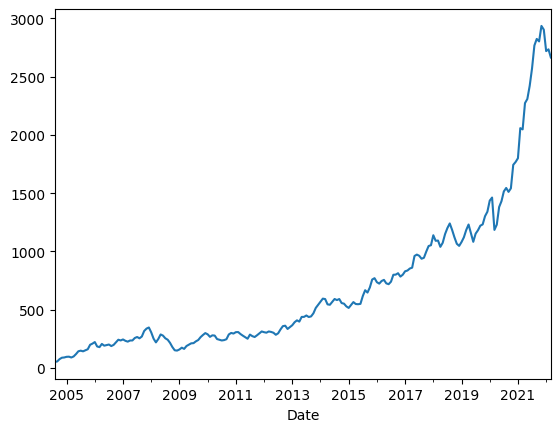

In [91]:
google['Close'].resample('M').mean().plot() #downsampling

<Axes: xlabel='Date'>

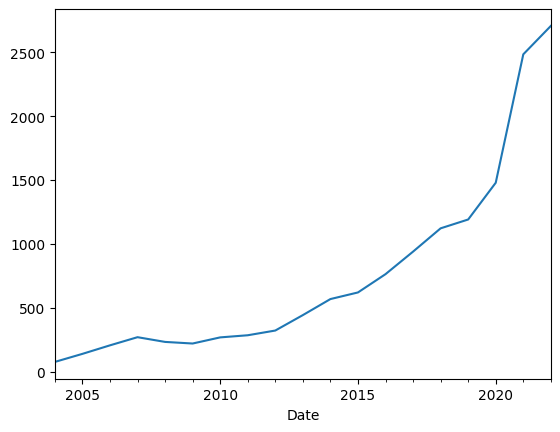

In [90]:
google['Close'].resample('Y').mean().plot() # downsampling

## Upsampling: from lower number of rows to higher number of rows

In [100]:
google.shape

(4431, 9)

### When we upsample as the created rows doesn't have any values so those will be replaces by nan

In [99]:
google['Close'].resample('12H').mean()

Date
2004-08-19 00:00:00      50.220219
2004-08-19 12:00:00            NaN
2004-08-20 00:00:00      54.209209
2004-08-20 12:00:00            NaN
2004-08-21 00:00:00            NaN
                          ...     
2022-03-22 00:00:00    2797.360107
2022-03-22 12:00:00            NaN
2022-03-23 00:00:00    2765.510010
2022-03-23 12:00:00            NaN
2022-03-24 00:00:00    2831.439941
Freq: 12H, Name: Close, Length: 12853, dtype: float64

In [107]:
google['Close'].resample('12H').mean().shape

(12853,)

### Reason we don't see any plot because of missing values

<Axes: xlabel='Date'>

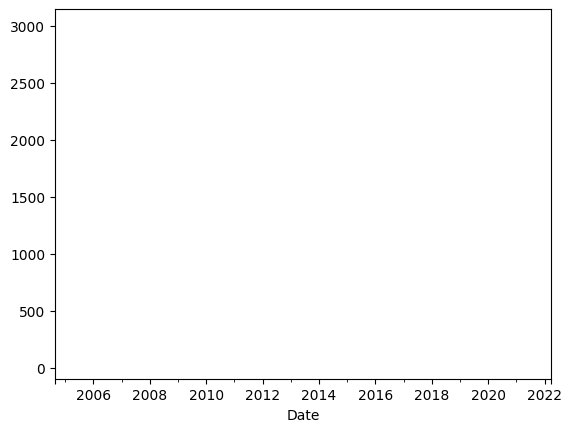

In [104]:
google['Close'].resample('12H').mean().plot()

### To fill the missing values we can use interpolate() function

In [108]:
google['Close'].resample('12H').interpolate()

Date
2004-08-19 00:00:00      50.220219
2004-08-19 12:00:00      52.214714
2004-08-20 00:00:00      54.209209
2004-08-20 12:00:00      54.300133
2004-08-21 00:00:00      54.391057
                          ...     
2022-03-22 00:00:00    2797.360107
2022-03-22 12:00:00    2781.435059
2022-03-23 00:00:00    2765.510010
2022-03-23 12:00:00    2798.474976
2022-03-24 00:00:00    2831.439941
Freq: 12H, Name: Close, Length: 12853, dtype: float64

### passing different parameter in interpolate() function for different analysis

Learn more about interpolate() here: https://pandas.pydata.org/docs/reference/api/pandas.Series.interpolate.html

<Axes: xlabel='Date'>

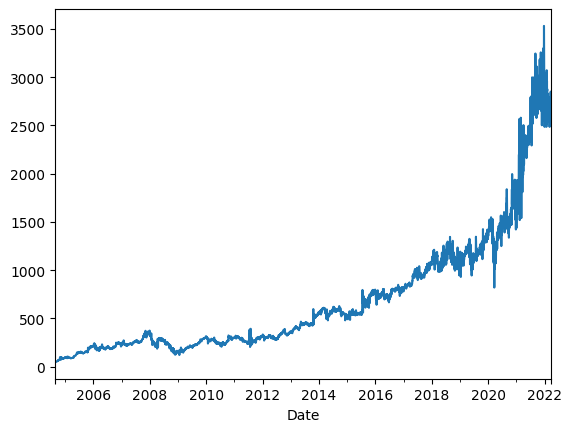

In [106]:
google['Close'].resample('12H').interpolate(method='spline',order=2).plot()

## Rolling Window(Smoothing)
Time series data in original format can be quite volatile, especially on smaller aggregation levels. The concept of rolling, or moving averages is a useful technique for smoothing time series data. 

In [114]:
google['Close'].rolling(3) # taking average of every 3 values

Rolling [window=3,center=False,axis=0,method=single]

In [110]:
google['Close'].rolling(3).mean()

Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23      53.061394
2004-08-24      53.817150
2004-08-25      53.431765
                 ...     
2022-03-18    2688.300049
2022-03-21    2707.106689
2022-03-22    2747.300049
2022-03-23    2761.633382
2022-03-24    2798.103353
Name: Close, Length: 4431, dtype: float64

In [115]:
print(google['Close'])
print(google['Close'].rolling(3).mean())

Date
2004-08-19      50.220219
2004-08-20      54.209209
2004-08-23      54.754753
2004-08-24      52.487488
2004-08-25      53.053055
                 ...     
2022-03-18    2722.510010
2022-03-21    2722.030029
2022-03-22    2797.360107
2022-03-23    2765.510010
2022-03-24    2831.439941
Name: Close, Length: 4431, dtype: float64
Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23      53.061394
2004-08-24      53.817150
2004-08-25      53.431765
                 ...     
2022-03-18    2688.300049
2022-03-21    2707.106689
2022-03-22    2747.300049
2022-03-23    2761.633382
2022-03-24    2798.103353
Name: Close, Length: 4431, dtype: float64


<Axes: xlabel='Date'>

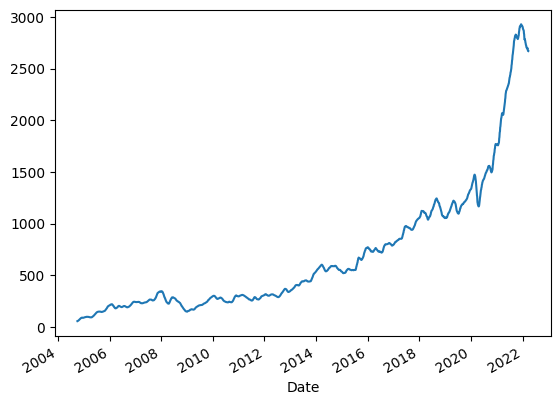

In [116]:
google['Close'].rolling(30).mean().plot() # smooth plot compare to the bottom one

<Axes: xlabel='Date'>

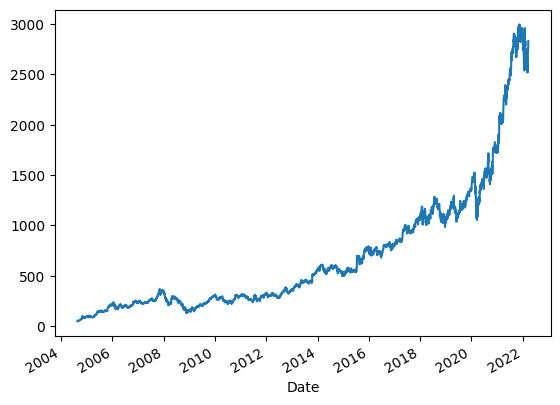

In [113]:
google['Close'].plot()

### exponentially moving average

<Axes: xlabel='Date'>

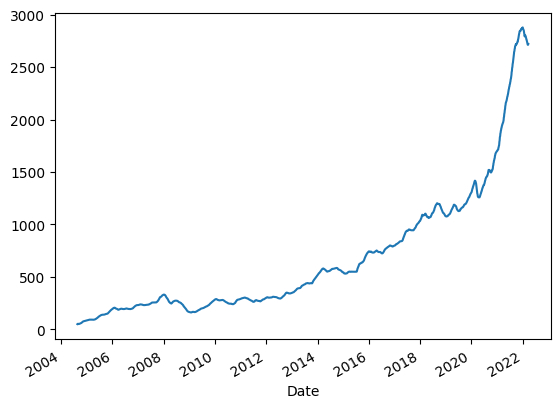

In [118]:
google['Close'].ewm(30).mean().plot()

## All the polts together, see how smoothing is taking effect

<Axes: xlabel='Date'>

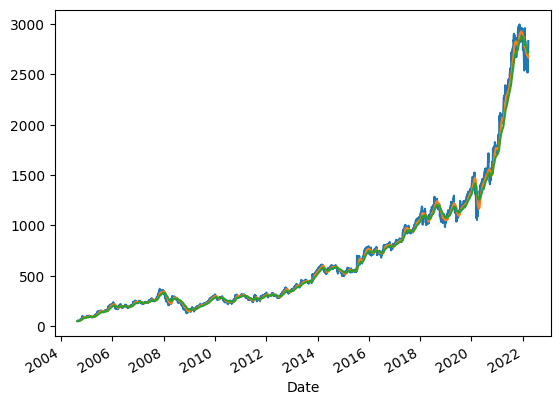

In [119]:
google['Close'].plot()
google['Close'].rolling(30).mean().plot()
google['Close'].ewm(30).mean().plot()

## Shifting

The shift() function is Pandas is used to, well, shift the entire series up or down by the desired number of periods.

In [120]:
google['Close']

Date
2004-08-19      50.220219
2004-08-20      54.209209
2004-08-23      54.754753
2004-08-24      52.487488
2004-08-25      53.053055
                 ...     
2022-03-18    2722.510010
2022-03-21    2722.030029
2022-03-22    2797.360107
2022-03-23    2765.510010
2022-03-24    2831.439941
Name: Close, Length: 4431, dtype: float64

In [121]:
google['Close'].shift(1)

Date
2004-08-19            NaN
2004-08-20      50.220219
2004-08-23      54.209209
2004-08-24      54.754753
2004-08-25      52.487488
                 ...     
2022-03-18    2676.780029
2022-03-21    2722.510010
2022-03-22    2722.030029
2022-03-23    2797.360107
2022-03-24    2765.510010
Name: Close, Length: 4431, dtype: float64

In [122]:
google['Close'].shift(-1)

Date
2004-08-19      54.209209
2004-08-20      54.754753
2004-08-23      52.487488
2004-08-24      53.053055
2004-08-25      54.009010
                 ...     
2022-03-18    2722.030029
2022-03-21    2797.360107
2022-03-22    2765.510010
2022-03-23    2831.439941
2022-03-24            NaN
Name: Close, Length: 4431, dtype: float64

In [123]:
login

,1,466,2017-01-07 18:24:07,Unnamed: 3
0,2,466,2017-01-07 18:24:55,NaN
1,3,458,2017-01-07 18:25:18,NaN
2,4,458,2017-01-07 18:26:21,NaN
3,5,592,2017-01-07 19:09:59,NaN
4,6,393,2017-01-08 00:41:19,NaN
...,...,...,...,...
2997,2999,1307,2018-01-04 10:48:28,183.82.121.201
2998,3000,1230,2018-01-04 11:22:00,47.247.147.114
2999,3001,1307,2018-01-04 13:13:44,183.82.121.201
3000,3002,1307,2018-01-04 13:13:45,183.82.121.201


## As there's no column name in the dataset, pandas assigned the first row as column, to avoid this we'll use header with a value of None, when reading the data and pandas will assign columns of its own

In [124]:
login = pd.read_csv('login.csv',header=None)

In [125]:
login

,0,1,2,3
0,1,466,2017-01-07 18:24:07,Unnamed: 3
1,2,466,2017-01-07 18:24:55,NaN
2,3,458,2017-01-07 18:25:18,NaN
3,4,458,2017-01-07 18:26:21,NaN
4,5,592,2017-01-07 19:09:59,NaN
...,...,...,...,...
2998,2999,1307,2018-01-04 10:48:28,183.82.121.201
2999,3000,1230,2018-01-04 11:22:00,47.247.147.114
3000,3001,1307,2018-01-04 13:13:44,183.82.121.201
3001,3002,1307,2018-01-04 13:13:45,183.82.121.201


In [131]:
login.rename({0:'Sl no',1:'user_id',2:'login_time',3:'ip_address'},axis=1,inplace=True)

In [133]:
login = login[['user_id','login_time']]

In [134]:
login

,user_id,login_time
0,466,2017-01-07 18:24:07
1,466,2017-01-07 18:24:55
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
4,592,2017-01-07 19:09:59
...,...,...
2998,1307,2018-01-04 10:48:28
2999,1230,2018-01-04 11:22:00
3000,1307,2018-01-04 13:13:44
3001,1307,2018-01-04 13:13:45


### Let's try to find out the user that loged in to the website most, what's its avery returning time, means in how many days the user return to the website

In [135]:
login['user_id'].value_counts()

user_id
413     222
458     208
492     162
882     140
592     122
       ... 
1043      1
1045      1
1047      1
1048      1
880       1
Name: count, Length: 433, dtype: int64

In [137]:
login[login['user_id'] == 413]

,user_id,login_time
11,413,2017-01-09 12:29:25
12,413,2017-01-09 12:40:39
14,413,2017-01-09 14:08:04
33,413,2017-01-10 14:36:23
35,413,2017-01-10 15:22:45
...,...,...
2958,413,2017-12-29 18:20:32
2963,413,2017-12-30 13:41:21
2974,413,2018-01-01 15:16:25
2982,413,2018-01-02 18:15:45


In [138]:
max_log = login[login['user_id'] == 413]

In [141]:
max_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 11 to 2997
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     222 non-null    int64 
 1   login_time  222 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [142]:
pd.to_datetime(max_log['login_time'])

11     2017-01-09 12:29:25
12     2017-01-09 12:40:39
14     2017-01-09 14:08:04
33     2017-01-10 14:36:23
35     2017-01-10 15:22:45
               ...        
2958   2017-12-29 18:20:32
2963   2017-12-30 13:41:21
2974   2018-01-01 15:16:25
2982   2018-01-02 18:15:45
2997   2018-01-04 10:43:43
Name: login_time, Length: 222, dtype: datetime64[ns]

In [144]:
#max_log['login_time'] = pd.to_datetime(max_log['login_time'])
max_log.loc['login_time'] = pd.to_datetime(max_log['login_time'])

/var/folders/h1/njy9595n2lj4xjmnz1st5v4h0000gn/T/ipykernel_1354/2818116573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_log.loc['login_time'] = pd.to_datetime(max_log['login_time'])


In [145]:
max_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 11 to login_time
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     222 non-null    object        
 1   login_time  222 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 5.2+ KB


In [147]:
max_log['login_time'].shift(1)

11                           NaT
12           2017-01-09 12:29:25
14           2017-01-09 12:40:39
33           2017-01-09 14:08:04
35           2017-01-10 14:36:23
                     ...        
2963         2017-12-29 18:20:32
2974         2017-12-30 13:41:21
2982         2018-01-01 15:16:25
2997         2018-01-02 18:15:45
login_time   2018-01-04 10:43:43
Name: login_time, Length: 223, dtype: datetime64[ns]

In [148]:
max_log['shifted'] = max_log['login_time'].shift(1)

/var/folders/h1/njy9595n2lj4xjmnz1st5v4h0000gn/T/ipykernel_1354/2558347175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_log['shifted'] = max_log['login_time'].shift(1)


In [149]:
max_log

,user_id,login_time,shifted
11,413,2017-01-09 12:29:25,NaT
12,413,2017-01-09 12:40:39,2017-01-09 12:29:25
14,413,2017-01-09 14:08:04,2017-01-09 12:40:39
33,413,2017-01-10 14:36:23,2017-01-09 14:08:04
35,413,2017-01-10 15:22:45,2017-01-10 14:36:23
...,...,...,...
2963,413,2017-12-30 13:41:21,2017-12-29 18:20:32
2974,413,2018-01-01 15:16:25,2017-12-30 13:41:21
2982,413,2018-01-02 18:15:45,2018-01-01 15:16:25
2997,413,2018-01-04 10:43:43,2018-01-02 18:15:45


In [150]:
max_log['login_time'] - max_log['shifted']

11                       NaT
12           0 days 00:11:14
14           0 days 01:27:25
33           1 days 00:28:19
35           0 days 00:46:22
                   ...      
2963         0 days 19:20:49
2974         2 days 01:35:04
2982         1 days 02:59:20
2997         1 days 16:27:58
login_time               NaT
Length: 223, dtype: timedelta64[ns]

In [151]:
(max_log['login_time'] - max_log['shifted']).mean()

Timedelta('1 days 15:05:13.384615384')

In [153]:
login.login_time

0       2017-01-07 18:24:07
1       2017-01-07 18:24:55
2       2017-01-07 18:25:18
3       2017-01-07 18:26:21
4       2017-01-07 19:09:59
               ...         
2998    2018-01-04 10:48:28
2999    2018-01-04 11:22:00
3000    2018-01-04 13:13:44
3001    2018-01-04 13:13:45
3002    2018-01-04 14:10:04
Name: login_time, Length: 3003, dtype: object